### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
### predicting the quality of wine.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df_wine=pd.read_csv('winequality-red.csv')

In [4]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_wine.shape

(1599, 12)

In [6]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<AxesSubplot: >

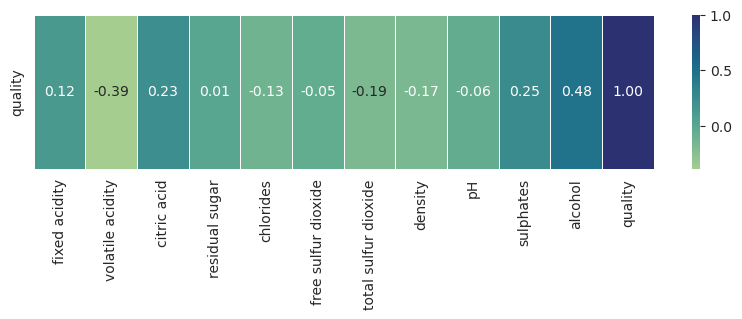

In [8]:
plt.figure(figsize=(10,2))
sns.heatmap(df_wine.corr().tail(1),cmap='crest',annot=True,linewidth=.5,fmt=".2f")

In [9]:
## AS seen from heatmap alcohol is most positive corrlated with quality of wine and volatile_acidity is most negaive corelated

In [10]:
## Alcohol is the most important feature in predicting quality, after that sulphates is having positively related in quality prediction,
## citric acid is somewha corelated and other features has not much effect on prediction of quality

### Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
### Discuss the advantages and disadvantages of different imputation techniques.

In [11]:
##  Missing data can be found out using below function

In [12]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
## from above we found that there is no missing values in the dataset

In [14]:
## if we could have found any we can either remove it if nan value is large otherwise we can use imputation (mean,median or mode) 
## if numerical value column in there then we can use either median or mode , if outlier is there we use median otherwise we cna use mean
## if categorical column is ther we can use mode to fill nan value

In [15]:
### The disadvantage would be that improper imputation will result in misleading data
## By using proper imputation technique the advantage is that most information is retained of the features which can enhance prediction

### Q3. What are the key factors that affect students' performance in exams? How would you go about
### analyzing these factors using statistical techniques?

In [16]:
df_student=pd.read_csv("stud.csv")

In [17]:
df_student.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [18]:
df_student.shape

(1000, 8)

In [19]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
cat_col=[]
num_col=[]
for col in df_student:
    if df_student[col].dtype=='O':
        cat_col.append(col)
    else:
        num_col.append(col)

In [21]:
cat_col

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [22]:
num_col

['math_score', 'reading_score', 'writing_score']

In [23]:
df_student[num_col].describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [24]:
### From above statistics we can infer  the average marks, standard deviation are almost same,but minimum marks in case of math_score is 0 

In [25]:
df_student[cat_col].describe()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [26]:
### from above we can infer how many unique values are ther in each category and which are maximum in numbers

In [27]:
df_student['average']=(df_student['math_score']+df_student['reading_score']+df_student['writing_score'])/3

In [28]:
df_student.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [29]:
df_student[cat_col].nunique()

gender                         2
race_ethnicity                 5
parental_level_of_education    6
lunch                          2
test_preparation_course        2
dtype: int64

<AxesSubplot: xlabel='average', ylabel='Count'>

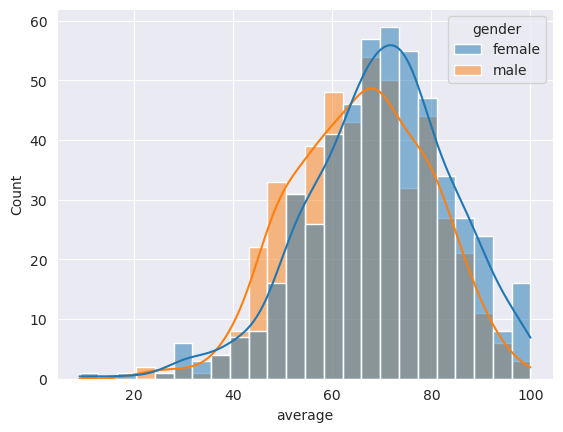

In [30]:
sns.histplot(data=df_student,x='average',hue='gender',kde=True)

<AxesSubplot: xlabel='gender', ylabel='average'>

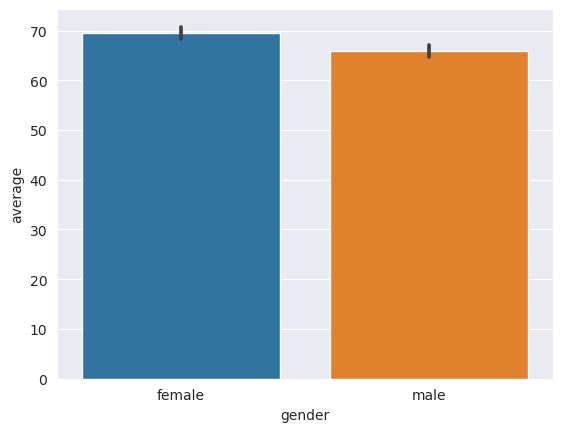

In [31]:
sns.barplot(data=df_student,x='gender',y='average')

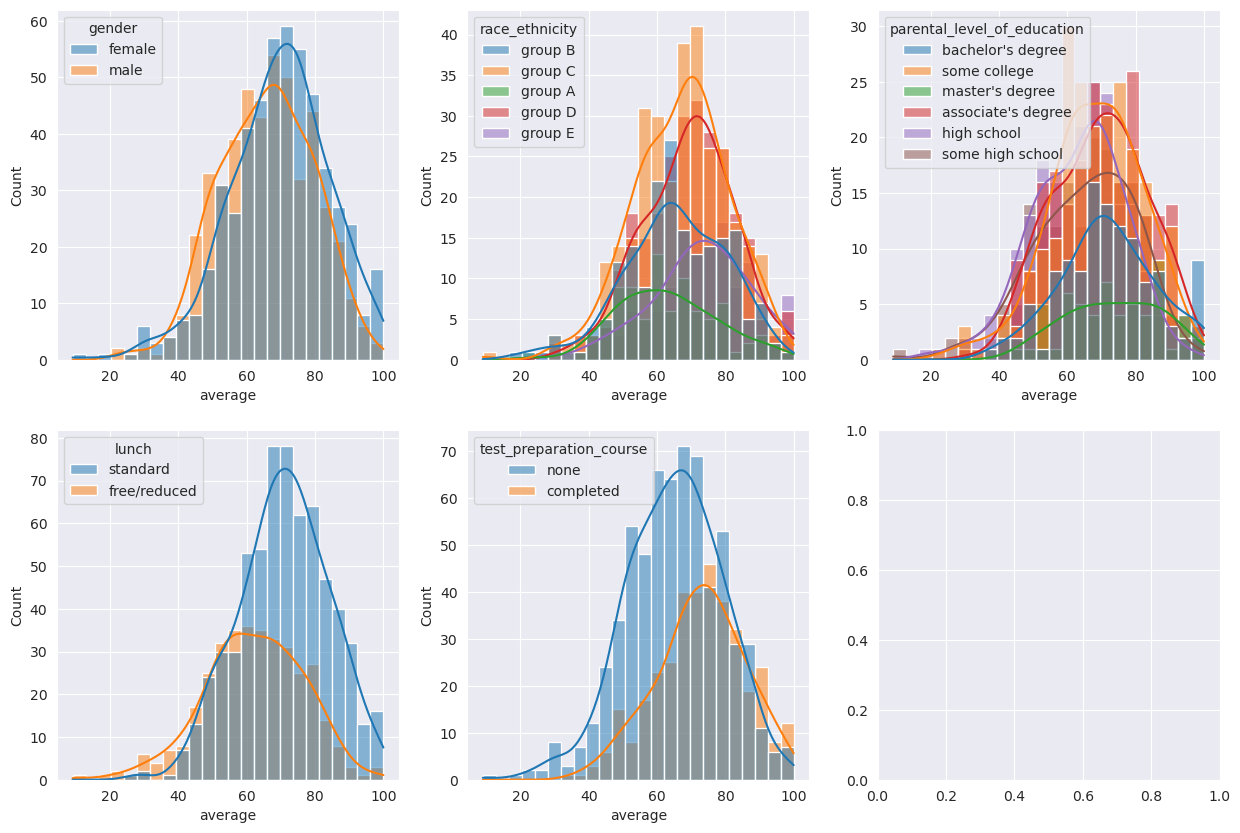

In [32]:
fig,axis=plt.subplots(2,3,figsize=(15,10))

plt.subplot(231)
sns.histplot(data=df_student,x=df_student['average'],kde=True,hue='gender')

plt.subplot(232)
sns.histplot(data=df_student,x=df_student['average'],kde=True,hue='race_ethnicity')

plt.subplot(233)
sns.histplot(data=df_student,x=df_student['average'],kde=True,hue='parental_level_of_education')

plt.subplot(234)
sns.histplot(data=df_student,x=df_student['average'],kde=True,hue='lunch')

plt.subplot(235)
sns.histplot(data=df_student,x=df_student['average'],kde=True,hue='test_preparation_course')

plt.show()

In [33]:
### from above it can be infered that females average marks are higher as compared to males

In [34]:
### Group A and Group B races has less average marks

In [35]:
### Parents level of Education does not matter much in Marks of the students

In [36]:
### Stadard lunch students tends to perform well in exams

In [37]:
### test preparation course suugest that who has completed has higher marks 

### Q4. Describe the process of feature engineering in the context of the student performance data set. How
### did you select and transform the variables for your model?

In [38]:
### From previous Question we have obtained new column 'Average' by taking the average of maths,reading and writing score.
## We have introduced nw feature in this case for observation

In [39]:
###  we can also use one hot encoding to convert our categorical columns in case we want to build model to predict marks

### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
### of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
### these features to improve normality?

In [40]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


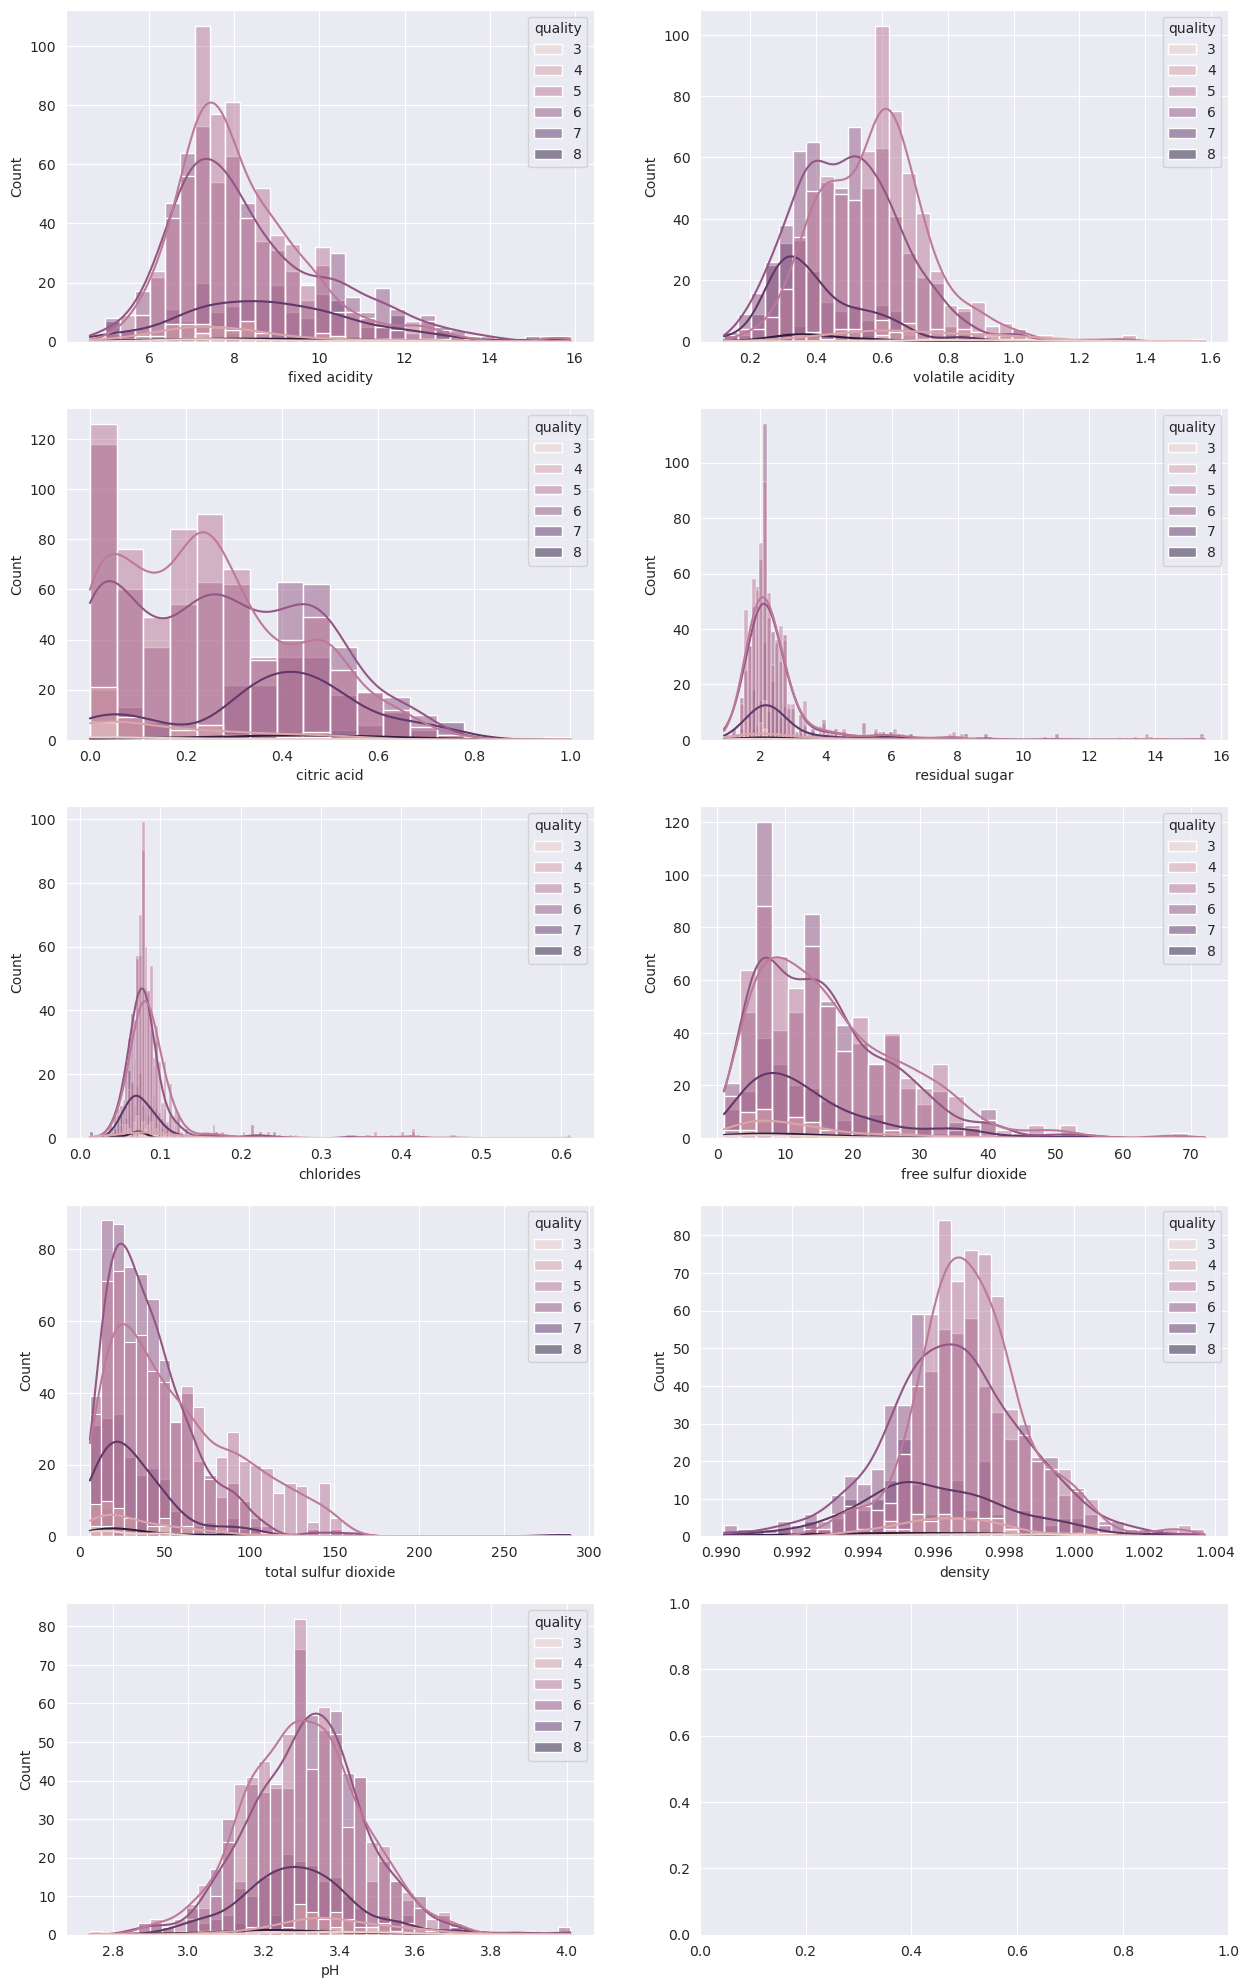

In [41]:
fig,axis=plt.subplots(5,2,figsize=(15,25))
plt.subplot(521)
sns.histplot(data=df_wine,x='fixed acidity',hue='quality',kde=True)

plt.subplot(522)
sns.histplot(data=df_wine,x="volatile acidity",hue='quality',kde=True)

plt.subplot(523)
sns.histplot(data=df_wine,x='citric acid',hue='quality',kde=True)

plt.subplot(524)
sns.histplot(data=df_wine,x='residual sugar',hue='quality',kde=True)

plt.subplot(525)
sns.histplot(data=df_wine,x='chlorides',hue='quality',kde=True)

plt.subplot(526)
sns.histplot(data=df_wine,x='free sulfur dioxide',hue='quality',kde=True)

plt.subplot(527)
sns.histplot(data=df_wine,x='total sulfur dioxide',hue='quality',kde=True)

plt.subplot(528)
sns.histplot(data=df_wine,x='density',hue='quality',kde=True)

plt.subplot(529)
sns.histplot(data=df_wine,x='pH',hue='quality',kde=True)


plt.show()

<AxesSubplot: xlabel='quality', ylabel='Count'>

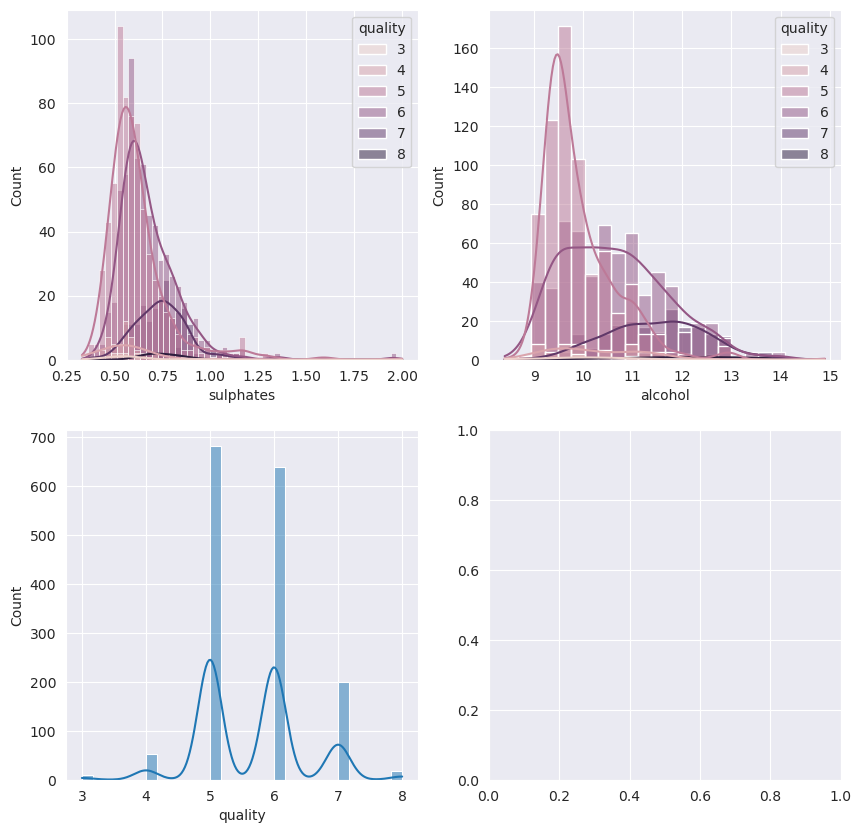

In [42]:
fig,axis=plt.subplots(2,2,figsize=(10,10))
plt.subplot(221)
sns.histplot(data=df_wine,x='sulphates',hue='quality',kde=True)

plt.subplot(222)
sns.histplot(data=df_wine,x='alcohol',hue='quality',kde=True)

plt.subplot(223)
sns.histplot(x=df_wine['quality'],kde=True)

In [43]:
## citric acid,free sulphur dioxide ,total sulphur dioxide shows abnormality in data as they are skewed ,it suggest that there may be outlier in the data we can either remove outlier
## or do some log or sqrt transformation to bring normality

### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
### features. What is the minimum number of principal components required to explain 90% of the variance in
### the data?

In [44]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
from sklearn.decomposition import PCA

In [46]:
pca=PCA(n_components=3)

In [47]:
X_pca=pca.fit_transform(df_wine)

In [48]:
X_df=pd.DataFrame(X_pca,columns=['pca1','pca2','pca3'])

In [49]:
X_df

,pca1,pca2,pca3
0,-13.222027,-2.031922,-1.181235
1,22.040255,4.401791,-0.354991
2,7.165362,-2.508321,-0.624638
3,13.428369,-1.946032,2.650260
4,-13.222027,-2.031922,-1.181235
...,...,...,...
1594,1.131806,16.304659,-1.912271
1595,9.488266,21.630751,-1.968144
1596,-3.432931,14.274277,-1.732279
1597,1.135574,16.307692,-2.189553


In [50]:
pca.explained_variance_ratio_

array([0.94607951, 0.04834835, 0.00259599])

In [51]:
### Clearly from above we have 1st component which has explained 94% of Variance

In [52]:
### only 1 component is enough to get more than 90 % varaince